<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/time_series_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitPredict

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-06-28 16:19:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2024-06-28 16:19:44 (37.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])

In [4]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})

In [6]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [71]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

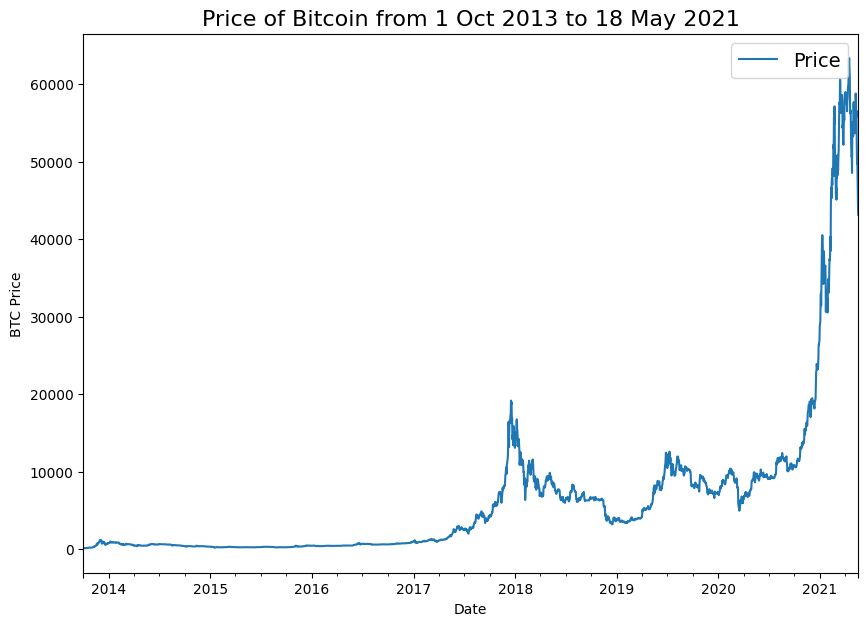

In [7]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing timeseries data using pythons csv module

In [8]:
import csv
from types import new_class
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
    reader = csv.reader(f)
    next(reader)  # This will skip the header row
    for row in reader:
        # strptime takes string date and converts it to datetime.datetime object using format specified
        timesteps.append(datetime.strptime(row[1], "%Y-%m-%d"))
        btc_price.append(float(row[2]))

In [9]:
print(timesteps[:10])
print(btc_price[:10])

[datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 5, 0, 0), datetime.datetime(2013, 10, 6, 0, 0), datetime.datetime(2013, 10, 7, 0, 0), datetime.datetime(2013, 10, 8, 0, 0), datetime.datetime(2013, 10, 9, 0, 0), datetime.datetime(2013, 10, 10, 0, 0)]
[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116]


Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

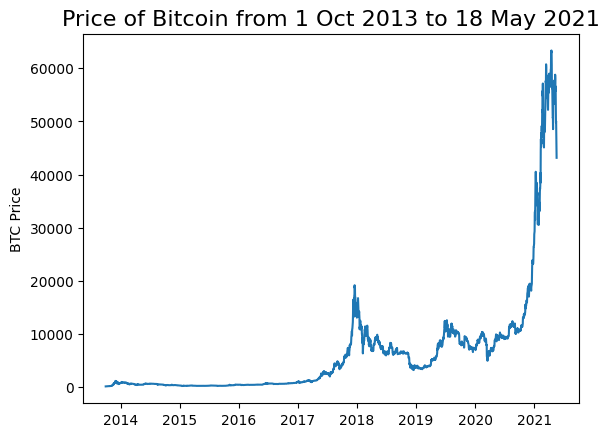

In [10]:
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)

## Create train and test data

In [11]:
split_size = int(0.8 * len(btc_price))

X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

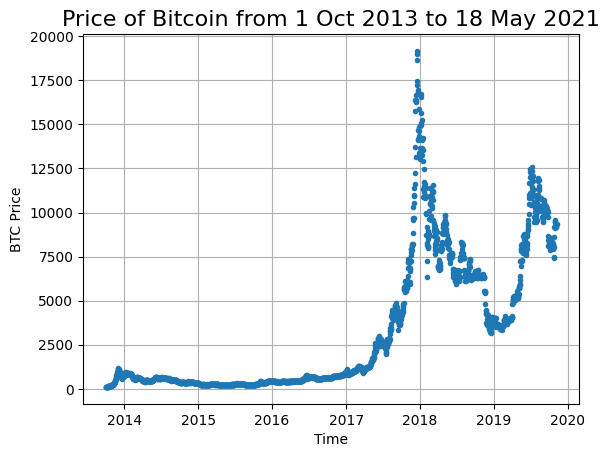

In [12]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
    plt.show()

plot_time_series(timesteps=X_train, values=y_train)

## Modeling experiments

## Model 0 - Naive Forcast (Baseline)

In [13]:
naive_forcast = y_test[:-1]

In [14]:
naive_forcast[:10], naive_forcast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

In [15]:
y_test[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

## Evaluating time series forecasting

1. MAE
2. MSE

In [16]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    return mae / tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

def mean_squared_scaled_error(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return mse / tf.reduce_mean(tf.square(y_true))

def mean_absolute_percentage_error(y_true, y_pred):
    return tf.keras.metrics.mean_absolute(y_true, y_pred) * 100

In [17]:
mean_absolute_scaled_error(tf.constant(y_test[1:]), tf.constant(naive_forcast)).numpy()

0.99957

In [162]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  return {"mae": mae.numpy(), "mse": mse.numpy(), "rmse": rmse.numpy(), "mape": mape.numpy()}


def evaluate_preds_v2(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [19]:
evaluate_preds(y_test[1:], naive_forcast)

{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mape': 2.5165248}

In [21]:
y_train[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [23]:
btc_price[:10], btc_price[10]

([123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116],
 125.27966)

In [30]:
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of data for prediction

In [31]:
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [47]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

In [49]:
tf.squeeze(test_window).numpy(), tf.squeeze(test_label).numpy()

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [80]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [81]:
window, label = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [84]:
window[:5], label[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [95]:
len(label), len(window)

(2780, 2780)

In [115]:
def make_train_test_split(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test sets.
  """
  target_size = int(len(windows) * (1-test_split))
  train_windows = windows[:target_size]
  train_labels = labels[:target_size]
  test_windows = windows[target_size:]
  test_labels = labels[target_size:]
  return train_windows, test_windows, train_labels, test_labels

In [116]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(window, label)

In [117]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [119]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Model 1: Window: 7, Horizon:1

In [120]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [133]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
hisotry_model_1 = model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
18/18 [==============================] - 3s 45ms/step - loss: 626.2380 - mae: 626.2380 - val_loss: 1211.1188 - val_mae: 1211.1188
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 250.7457 - mae: 250.7457 - val_loss: 1219.6691 - val_mae: 1219.6691
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 207.2346 - mae: 207.2346 - val_loss: 1176.7089 - val_mae: 1176.7089
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 195.9948 - mae: 195.9948 - val_loss: 1107.5193 - val_mae: 1107.5193
Epoch 5/100
18/18 [==============================] - 0s 28ms/step - loss: 192.4341 - mae: 192.4341 - val_loss: 1035.2435 - val_mae: 1035.2435
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 192.5799 - mae: 192.5799 - val_loss: 984.9058 - val_mae: 984.9058
Epoch 7/100
18/18 [==============================] - 0s 28ms/step - loss: 175.4521 - mae: 175.4521 - val_loss: 978.5955 - val_mae: 978.5955
Epoch 8/100

In [122]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 618.1306 - mae: 618.1306


[618.130615234375, 618.130615234375]

In [131]:
model_1_preds = tf.squeeze(model_1.predict(test_windows))

18/18 [==============================] - 0s 3ms/step


In [132]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 618.1305, 'mse': 1257376.6, 'rmse': 1121.328, 'mape': 2.790864}

In [ ]:
{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mape': 2.5165248}

In [141]:
hisotry_model_1.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

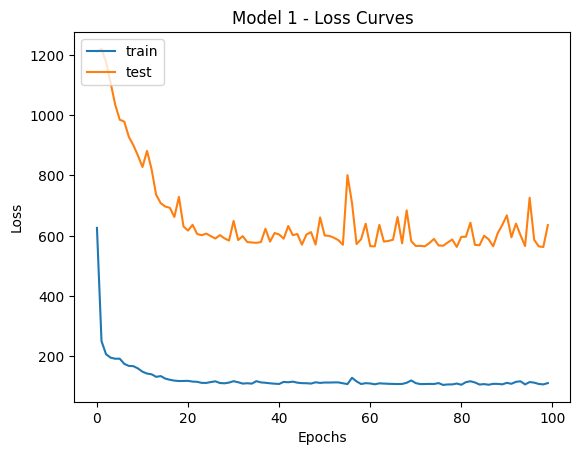

In [142]:
plt.plot(hisotry_model_1.history["mae"])
plt.plot(hisotry_model_1.history["val_mae"])
plt.title("Model 1 - Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"], loc="upper left")
plt.show()

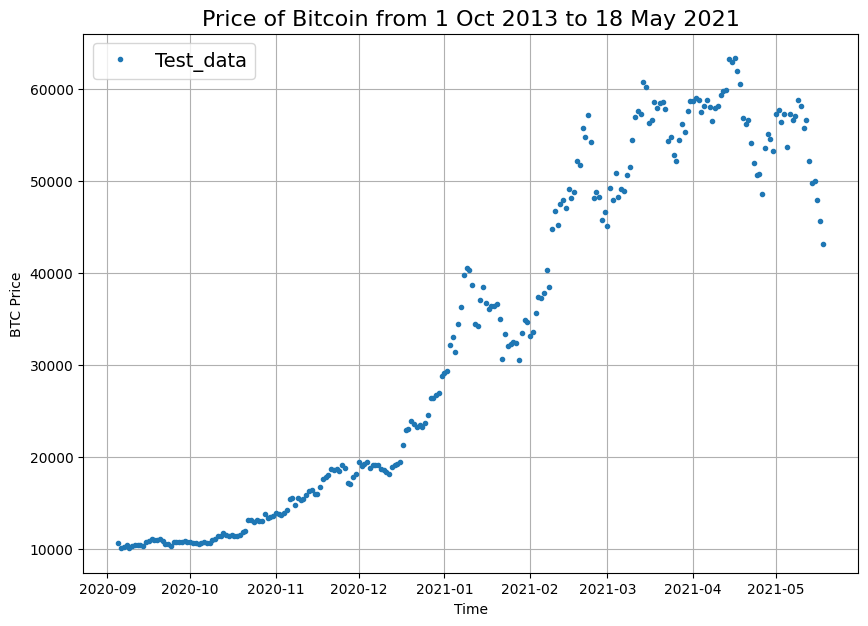

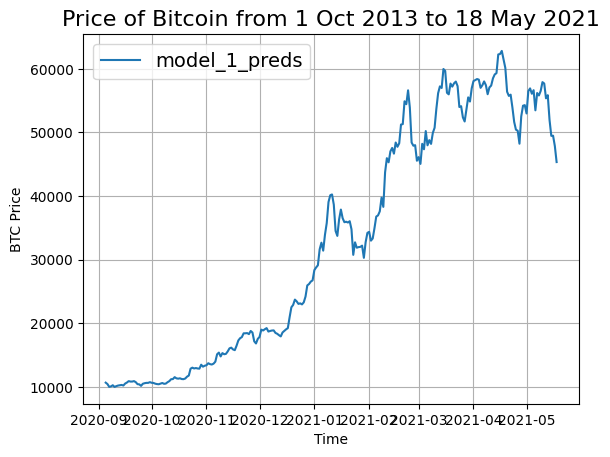

In [143]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Window: 30, Horizon:1

In [157]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [158]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 614.3652


614.365234375

In [159]:
model_2_preds = tf.squeeze(model_2.predict(test_windows))

18/18 [==============================] - 0s 1ms/step


In [160]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 614.36523, 'mse': 1281748.9, 'rmse': 1132.1434, 'mape': 2.814453}

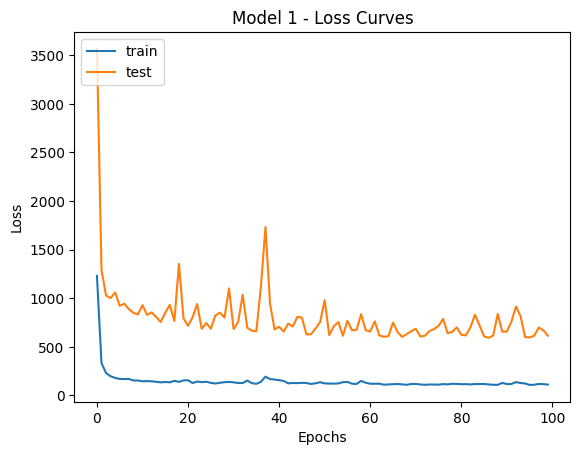

In [161]:
plt.plot(history_model_2.history["loss"])
plt.plot(history_model_2.history["val_loss"])
plt.title("Model 1 - Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Model 3: Window=30, Horizon=7

In [163]:
HORIZON = 7 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs=100,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

model_3_preds = tf.squeeze(model_3.predict(test_windows))

model_3_results = evaluate_preds_v2(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_3_preds)
model_3_results


Epoch 1/100
18/18 [==============================] - 4s 94ms/step - loss: 2304.7634 - val_loss: 3041.7520
Epoch 2/100
18/18 [==============================] - 1s 72ms/step - loss: 516.9246 - val_loss: 2483.6216
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 381.8672 - val_loss: 1918.8158
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 349.5141 - val_loss: 1819.7947
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 332.4509 - val_loss: 1842.7283
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 323.5327 - val_loss: 1648.2583
Epoch 7/100
18/18 [==============================] - 0s 27ms/step - loss: 309.2603 - val_loss: 1581.5259
Epoch 8/100
18/18 [==============================] - 0s 28ms/step - loss: 306.0070 - val_loss: 1553.2380
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 298.5441 - val_loss: 1743.0801
Epoch 10/100
18/18 [==============================] - 0s

{'mae': 1369.9309,
 'mse': 6016179.5,
 'rmse': 1548.8325,
 'mape': 6.0253544,
 'mase': 2.4377153}